<a href="https://colab.research.google.com/github/jyothsna1076/AnamolyDetectionPRMLProject/blob/main/RandomForestPRML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
np.random.seed(42)
df= pd.read_csv("Train_data.csv")
def le(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

le(df)
x=  df.drop("class",axis= 1)
y= df["class"]
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state= 42)


In [4]:
from collections import Counter

class MyRandomForest:
    def __init__(self, n_trees=10,sample_ratio=0.3, max_depth=None, n_features=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.sample_ratio = sample_ratio
        self.n_features = n_features
        self.trees = []

    def bootstrap_sample(self, X, y):
        n_samples = X.shape[0]
        indices = np.random.choice(n_samples, int(n_samples* self.sample_ratio), replace=True)
        return X.iloc[indices], y.iloc[indices]

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            X_sample, y_sample = self.bootstrap_sample(X, y)
            tree = DecisionTreeClassifier(
                max_depth=self.max_depth,
                max_features=self.n_features,
                # random_state= 42
            )
            tree.fit(X_sample, y_sample)
            # plt.figure(figsize=(30, 20))
            # plot_tree(tree)
            # plt.show()
            self.trees.append(tree)

    def predict(self, X):
        tree_predictions = np.array([tree.predict(X) for tree in self.trees])
        final_predictions = []

        for sample_preds in tree_predictions.T:
            # Majority vote
            vote = Counter(sample_preds).most_common(1)[0][0]
            final_predictions.append(vote)

        return np.array(final_predictions)

Row Sampling


In [5]:
rf = MyRandomForest(n_trees=5, max_depth=None, n_features=None)

# Fit the model on your dataset
rf.fit(x_train, y_train)

# Predict
y_pred = rf.predict(x_test)

# Evaluate
from sklearn.metrics import accuracy_score
print("Accuracy on your dataset:", accuracy_score(y_test, y_pred))

Accuracy on your dataset: 0.9958325064496923


In [6]:
def run_experiment(X, y, sample_ratio=0.3, max_depth=None, test_size=0.2):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)

    accuracies = []

    for n_trees in range(1,15):
        model = MyRandomForest(n_trees=n_trees, sample_ratio=sample_ratio, max_depth=max_depth,n_features=None)
        model.fit(x_train, y_train)
        preds = model.predict(x_test)
        acc = accuracy_score(y_test, preds)
        accuracies.append(acc)
        print(f"{n_trees} trees ‚Üí Accuracy: {acc:.4f}")

    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, 15), accuracies, marker='o')
    plt.xlabel("Number of Trees")
    plt.ylabel("Accuracy")
    plt.title(f"Accuracy vs. Number of Trees (sample_ratio={sample_ratio}, max_depth={max_depth})")
    plt.grid(True)
    plt.show()


1 trees ‚Üí Accuracy: 0.9905
2 trees ‚Üí Accuracy: 0.9936
3 trees ‚Üí Accuracy: 0.9946
4 trees ‚Üí Accuracy: 0.9964
5 trees ‚Üí Accuracy: 0.9962
6 trees ‚Üí Accuracy: 0.9964
7 trees ‚Üí Accuracy: 0.9970
8 trees ‚Üí Accuracy: 0.9964
9 trees ‚Üí Accuracy: 0.9972
10 trees ‚Üí Accuracy: 0.9966
11 trees ‚Üí Accuracy: 0.9970
12 trees ‚Üí Accuracy: 0.9978
13 trees ‚Üí Accuracy: 0.9976
14 trees ‚Üí Accuracy: 0.9962


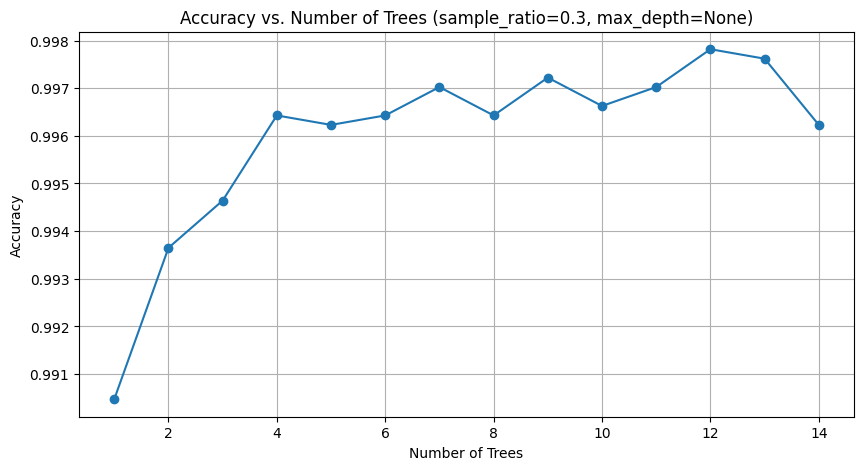

In [7]:
run_experiment(x,y)

In [8]:
def experiment_sampling_effect(X, y, tree_count=10, max_depth=None, test_size=0.2):
    sample_ratios = np.linspace(0.1, 1.0, 10)  # 10 values from 0.1 to 1.0
    accuracies = []

    # Train-test split
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    for ratio in sample_ratios:
        model = MyRandomForest(n_trees=tree_count, sample_ratio=ratio, max_depth=max_depth)
        model.fit(x_train, y_train)
        preds = model.predict(x_test)
        acc = accuracy_score(y_test, preds)
        accuracies.append(acc)
        print(f"Sampling Ratio: {ratio:.2f} ‚Üí Accuracy: {acc:.4f}")

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(sample_ratios, accuracies, marker='o')
    plt.xlabel("Sampling Ratio (Fraction of Training Data per Tree)")
    plt.ylabel("Accuracy")
    plt.title(f"Accuracy vs. Sampling Ratio (Trees={tree_count}, max_depth={max_depth})")
    plt.grid(True)
    plt.show()


Sampling Ratio: 0.10 ‚Üí Accuracy: 0.9960
Sampling Ratio: 0.20 ‚Üí Accuracy: 0.9960
Sampling Ratio: 0.30 ‚Üí Accuracy: 0.9966
Sampling Ratio: 0.40 ‚Üí Accuracy: 0.9968
Sampling Ratio: 0.50 ‚Üí Accuracy: 0.9974
Sampling Ratio: 0.60 ‚Üí Accuracy: 0.9980
Sampling Ratio: 0.70 ‚Üí Accuracy: 0.9986
Sampling Ratio: 0.80 ‚Üí Accuracy: 0.9974
Sampling Ratio: 0.90 ‚Üí Accuracy: 0.9976
Sampling Ratio: 1.00 ‚Üí Accuracy: 0.9978


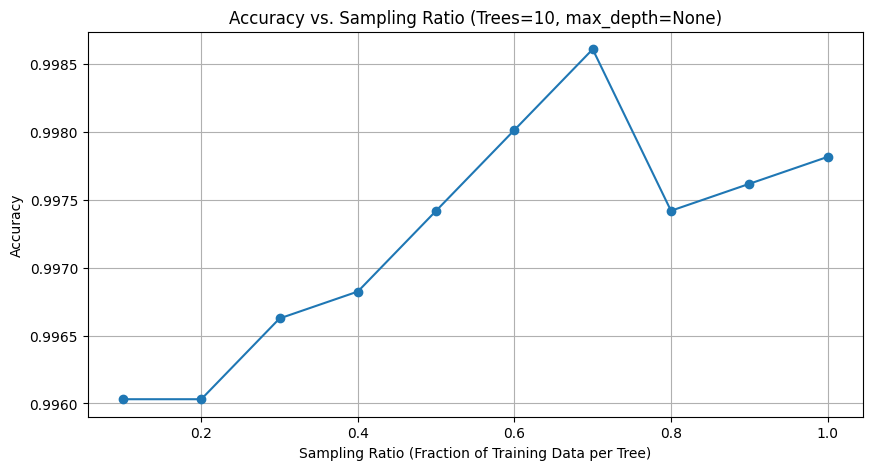

In [9]:
experiment_sampling_effect(x,y)

In [10]:
def experiment_depth_effect(X, y, n_trees=10, sample_ratio=0.3, test_size=0.2):
    depths = list(range(1, 16))  # max_depth from 1 to 15
    accuracies = []

    # Train-test split
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    for depth in depths:
        model = MyRandomForest(n_trees=n_trees, sample_ratio=sample_ratio, max_depth=depth)
        model.fit(x_train, y_train)
        preds = model.predict(x_test)
        acc = accuracy_score(y_test, preds)
        accuracies.append(acc)
        print(f"Depth: {depth} ‚Üí Accuracy: {acc:.4f}")

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(depths, accuracies, marker='o')
    plt.xlabel("Max Depth of Trees")
    plt.ylabel("Accuracy")
    plt.title(f"Accuracy vs. Tree Depth (Trees={n_trees}, sample_ratio={sample_ratio})")
    plt.grid(True)
    plt.show()


Depth: 1 ‚Üí Accuracy: 0.9266
Depth: 2 ‚Üí Accuracy: 0.9518
Depth: 3 ‚Üí Accuracy: 0.9712
Depth: 4 ‚Üí Accuracy: 0.9808
Depth: 5 ‚Üí Accuracy: 0.9893
Depth: 6 ‚Üí Accuracy: 0.9935
Depth: 7 ‚Üí Accuracy: 0.9956
Depth: 8 ‚Üí Accuracy: 0.9954
Depth: 9 ‚Üí Accuracy: 0.9972
Depth: 10 ‚Üí Accuracy: 0.9960
Depth: 11 ‚Üí Accuracy: 0.9970
Depth: 12 ‚Üí Accuracy: 0.9966
Depth: 13 ‚Üí Accuracy: 0.9962
Depth: 14 ‚Üí Accuracy: 0.9964
Depth: 15 ‚Üí Accuracy: 0.9962


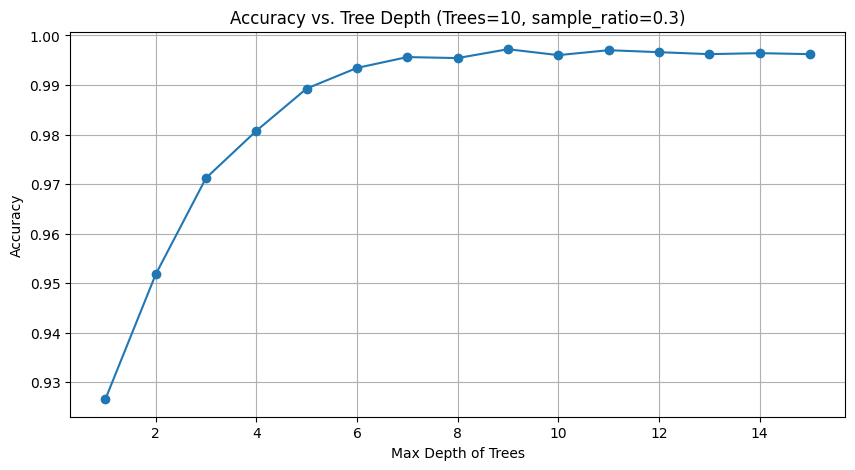

In [11]:
experiment_depth_effect(x,y)

In [12]:
from itertools import product

def grid_search_rf(X, y, sample_ratios, tree_counts, depths, test_size=0.2):
    best_acc = 0
    best_params = None
    results = []

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    for sample_ratio, n_trees, max_depth in product(sample_ratios, tree_counts, depths):
        model = MyRandomForest(n_trees=n_trees, sample_ratio=sample_ratio, max_depth=max_depth)
        model.fit(x_train, y_train)
        preds = model.predict(x_test)
        acc = accuracy_score(y_test, preds)
        results.append((acc, sample_ratio, n_trees, max_depth))
        print(f"Sample: {sample_ratio}, Trees: {n_trees}, Depth: {max_depth} ‚Üí Accuracy: {acc:.4f}")

        if acc > best_acc:
            best_acc = acc
            best_params = (sample_ratio, n_trees, max_depth)

    print("\nBest Configuration:")
    print(f"Sample Ratio: {best_params[0]}, Trees: {best_params[1]}, Max Depth: {best_params[2]} ‚Üí Accuracy: {best_acc:.4f}")

    return best_params


In [13]:
sample_ratios = [0.3, 0.5, 0.7, 1.0]
n_trees_options = [5, 10, 15]
max_depths = [3, 5, 10, None]


In [14]:
import joblib
best_sample, best_trees, best_depth = grid_search_rf(x, y, sample_ratios, n_trees_options, max_depths)

final_model = MyRandomForest(n_trees=best_trees, sample_ratio=best_sample, max_depth=best_depth)
final_model.fit(x_train, y_train)


joblib.dump(final_model, 'final_model.pkl')
# print(f"Final Model Accuracy: {final_acc:.4f}")


Sample: 0.3, Trees: 5, Depth: 3 ‚Üí Accuracy: 0.9710
Sample: 0.3, Trees: 5, Depth: 5 ‚Üí Accuracy: 0.9835
Sample: 0.3, Trees: 5, Depth: 10 ‚Üí Accuracy: 0.9944
Sample: 0.3, Trees: 5, Depth: None ‚Üí Accuracy: 0.9958
Sample: 0.3, Trees: 10, Depth: 3 ‚Üí Accuracy: 0.9696
Sample: 0.3, Trees: 10, Depth: 5 ‚Üí Accuracy: 0.9933
Sample: 0.3, Trees: 10, Depth: 10 ‚Üí Accuracy: 0.9962
Sample: 0.3, Trees: 10, Depth: None ‚Üí Accuracy: 0.9968
Sample: 0.3, Trees: 15, Depth: 3 ‚Üí Accuracy: 0.9698
Sample: 0.3, Trees: 15, Depth: 5 ‚Üí Accuracy: 0.9909
Sample: 0.3, Trees: 15, Depth: 10 ‚Üí Accuracy: 0.9972
Sample: 0.3, Trees: 15, Depth: None ‚Üí Accuracy: 0.9970
Sample: 0.5, Trees: 5, Depth: 3 ‚Üí Accuracy: 0.9696
Sample: 0.5, Trees: 5, Depth: 5 ‚Üí Accuracy: 0.9925
Sample: 0.5, Trees: 5, Depth: 10 ‚Üí Accuracy: 0.9978
Sample: 0.5, Trees: 5, Depth: None ‚Üí Accuracy: 0.9962
Sample: 0.5, Trees: 10, Depth: 3 ‚Üí Accuracy: 0.9696
Sample: 0.5, Trees: 10, Depth: 5 ‚Üí Accuracy: 0.9857
Sample: 0.5, Trees: 

['final_model.pkl']

In [15]:
model = joblib.load('final_model.pkl')
final_preds = model.predict(x_test)
final_acc = accuracy_score(y_test, final_preds)
print(f"Final Model Accuracy: {final_acc:.4f}")

Final Model Accuracy: 0.9978


Column Sampling


In [16]:
class MyRandomForest_comb:
    def __init__(self, n_trees=10, sample_ratio=0.3, max_depth=None, n_features=None, combined_sampling=False):
        self.n_trees = n_trees
        self.sample_ratio = sample_ratio
        self.max_depth = max_depth
        self.n_features = n_features
        self.combined_sampling = combined_sampling
        self.trees = []
        self.feature_indices_per_tree = []

    def bootstrap_sample(self, X, y):
        n_samples = X.shape[0]
        indices = np.random.choice(n_samples, int(n_samples * self.sample_ratio), replace=True)
        return X.iloc[indices], y.iloc[indices]

    def sample_features(self, X):
        n_total_features = X.shape[1]
        if self.n_features is None or self.n_features > n_total_features:
            selected_features = list(range(n_total_features))
        else:
            selected_features = np.random.choice(n_total_features, self.n_features, replace=False)
        return sorted(selected_features)

    def fit(self, X, y):
        self.trees = []
        self.feature_indices_per_tree = []

        for _ in range(self.n_trees):
            X_sample, y_sample = self.bootstrap_sample(X, y)

            if self.combined_sampling or self.n_features is not None:
                selected_features = self.sample_features(X_sample)
                X_sample = X_sample.iloc[:, selected_features]
                self.feature_indices_per_tree.append(selected_features)
            else:
                self.feature_indices_per_tree.append(None)

            tree = DecisionTreeClassifier(
                max_depth=self.max_depth,
                random_state=None
            )
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        tree_predictions = []

        for tree, feature_idx in zip(self.trees, self.feature_indices_per_tree):
            if feature_idx is not None:
                X_selected = X.iloc[:, feature_idx]
            else:
                X_selected = X
            tree_predictions.append(tree.predict(X_selected))

        # Majority vote
        tree_predictions = np.array(tree_predictions).T
        final_predictions = [Counter(row).most_common(1)[0][0] for row in tree_predictions]

        return np.array(final_predictions)


In [17]:
# Column Sampling Only
rf_column = MyRandomForest_comb(n_trees=10, sample_ratio=1.0, max_depth=5, n_features=10)
rf_column.fit(x_train, y_train)
print("Column Sampling Accuracy:", accuracy_score(y_test, rf_column.predict(x_test)))

# Combined Row + Column Sampling
rf_combined = MyRandomForest_comb(n_trees=10, sample_ratio=0.5, max_depth=5, n_features=10, combined_sampling=True)
rf_combined.fit(x_train, y_train)
print("Combined Sampling Accuracy:", accuracy_score(y_test, rf_combined.predict(x_test)))


Column Sampling Accuracy: 0.980353244691407
Combined Sampling Accuracy: 0.9859099027584838


In [18]:
def experiment_depth_effect_comb(X, y, n_trees=10, sample_ratio=1.0, n_features=None, combined_sampling=False, test_size=0.2):
    depths = list(range(1, 16))  # max_depth from 1 to 15
    accuracies = []

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    for depth in depths:
        model = MyRandomForest_comb(n_trees=n_trees, sample_ratio=sample_ratio, max_depth=depth,
                               n_features=n_features, combined_sampling=combined_sampling)
        model.fit(x_train, y_train)
        preds = model.predict(x_test)
        acc = accuracy_score(y_test, preds)
        accuracies.append(acc)
        print(f"Depth: {depth} ‚Üí Accuracy: {acc:.4f}")

    plt.figure(figsize=(10, 5))
    plt.plot(depths, accuracies, marker='o')
    plt.xlabel("Max Depth of Trees")
    plt.ylabel("Accuracy")
    plt.title(f"Accuracy vs. Tree Depth (Trees={n_trees}, Sampling={sample_ratio}, Features={n_features})")
    plt.grid(True)
    plt.show()


In [19]:
def experiment_feature_count_effect_comb(X, y, n_trees=10, sample_ratio=1.0, max_depth=None, test_size=0.2):
    total_features = X.shape[1]
    feature_counts = list(range(1, total_features + 1, max(1, total_features // 10)))  # Steps of ~10%
    accuracies = []

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    for n_feats in feature_counts:
        model = MyRandomForest_comb(n_trees=n_trees, sample_ratio=sample_ratio, max_depth=max_depth,
                               n_features=n_feats, combined_sampling=True)
        model.fit(x_train, y_train)
        preds = model.predict(x_test)
        acc = accuracy_score(y_test, preds)
        accuracies.append(acc)
        print(f"Features: {n_feats} ‚Üí Accuracy: {acc:.4f}")

    plt.figure(figsize=(10, 5))
    plt.plot(feature_counts, accuracies, marker='o')
    plt.xlabel("Number of Features Sampled")
    plt.ylabel("Accuracy")
    plt.title(f"Accuracy vs. Number of Features (Trees={n_trees}, Sample Ratio={sample_ratio})")
    plt.grid(True)
    plt.show()


In [20]:
def experiment_tree_count_effect_comb(X, y, sample_ratio=1.0, max_depth=None, n_features=None,
                                 combined_sampling=False, test_size=0.2):
    tree_counts = list(range(1, 16))  # Trees from 1 to 15
    accuracies = []

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    for n_trees in tree_counts:
        model = MyRandomForest_comb(n_trees=n_trees, sample_ratio=sample_ratio, max_depth=max_depth,
                               n_features=n_features, combined_sampling=combined_sampling)
        model.fit(x_train, y_train)
        preds = model.predict(x_test)
        acc = accuracy_score(y_test, preds)
        accuracies.append(acc)
        print(f"Trees: {n_trees} ‚Üí Accuracy: {acc:.4f}")

    plt.figure(figsize=(10, 5))
    plt.plot(tree_counts, accuracies, marker='o')
    plt.xlabel("Number of Trees")
    plt.ylabel("Accuracy")
    plt.title(f"Accuracy vs. Number of Trees (Depth={max_depth}, Features={n_features})")
    plt.grid(True)
    plt.show()


In [21]:
from itertools import product

def grid_search_rf_comb(X, y, sample_ratios, tree_counts, depths, n_features_list, test_size=0.2, combined_sampling=True):
    best_acc = 0
    best_params = None
    results = []

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    for sample_ratio, n_trees, max_depth, n_features in product(sample_ratios, tree_counts, depths, n_features_list):
        model = MyRandomForest_comb(n_trees=n_trees, sample_ratio=sample_ratio, max_depth=max_depth,
                               n_features=n_features, combined_sampling=combined_sampling)
        model.fit(x_train, y_train)
        preds = model.predict(x_test)
        acc = accuracy_score(y_test, preds)
        results.append((acc, sample_ratio, n_trees, max_depth, n_features))
        print(f"Sample: {sample_ratio}, Trees: {n_trees}, Depth: {max_depth}, Features: {n_features} ‚Üí Accuracy: {acc:.4f}")

        if acc > best_acc:
            best_acc = acc
            best_params = (sample_ratio, n_trees, max_depth, n_features)

    print("\n Best Configuration:")
    print(f"Sample Ratio: {best_params[0]}, Trees: {best_params[1]}, Max Depth: {best_params[2]}, Features: {best_params[3]} ‚Üí Accuracy: {best_acc:.4f}")

    return best_params


Depth: 1 ‚Üí Accuracy: 0.9290
Depth: 2 ‚Üí Accuracy: 0.9266
Depth: 3 ‚Üí Accuracy: 0.9591
Depth: 4 ‚Üí Accuracy: 0.9798
Depth: 5 ‚Üí Accuracy: 0.9780
Depth: 6 ‚Üí Accuracy: 0.9817
Depth: 7 ‚Üí Accuracy: 0.9843
Depth: 8 ‚Üí Accuracy: 0.9960
Depth: 9 ‚Üí Accuracy: 0.9931
Depth: 10 ‚Üí Accuracy: 0.9960
Depth: 11 ‚Üí Accuracy: 0.9923
Depth: 12 ‚Üí Accuracy: 0.9936
Depth: 13 ‚Üí Accuracy: 0.9925
Depth: 14 ‚Üí Accuracy: 0.9944
Depth: 15 ‚Üí Accuracy: 0.9929


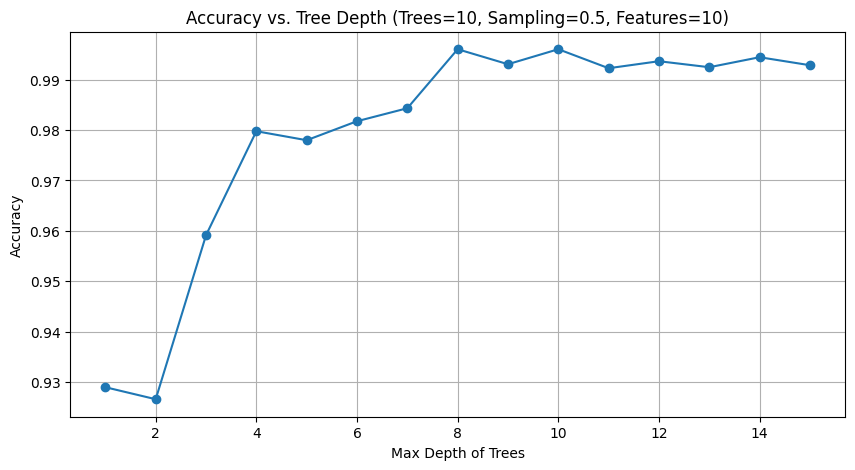

Features: 1 ‚Üí Accuracy: 0.8482
Features: 5 ‚Üí Accuracy: 0.9802
Features: 9 ‚Üí Accuracy: 0.9917
Features: 13 ‚Üí Accuracy: 0.9907
Features: 17 ‚Üí Accuracy: 0.9958
Features: 21 ‚Üí Accuracy: 0.9964
Features: 25 ‚Üí Accuracy: 0.9980
Features: 29 ‚Üí Accuracy: 0.9976
Features: 33 ‚Üí Accuracy: 0.9968
Features: 37 ‚Üí Accuracy: 0.9970
Features: 41 ‚Üí Accuracy: 0.9964


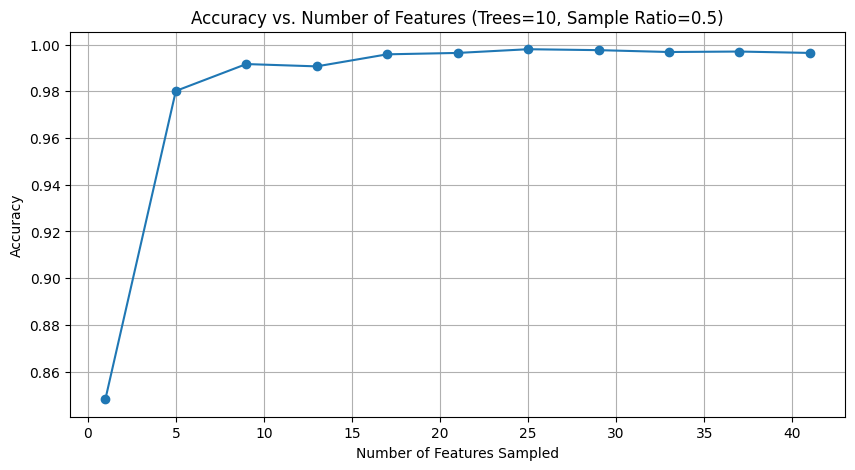

Trees: 1 ‚Üí Accuracy: 0.9784
Trees: 2 ‚Üí Accuracy: 0.9561
Trees: 3 ‚Üí Accuracy: 0.9940
Trees: 4 ‚Üí Accuracy: 0.9845
Trees: 5 ‚Üí Accuracy: 0.9891
Trees: 6 ‚Üí Accuracy: 0.9911
Trees: 7 ‚Üí Accuracy: 0.9827
Trees: 8 ‚Üí Accuracy: 0.9927
Trees: 9 ‚Üí Accuracy: 0.9946
Trees: 10 ‚Üí Accuracy: 0.9875
Trees: 11 ‚Üí Accuracy: 0.9933
Trees: 12 ‚Üí Accuracy: 0.9952
Trees: 13 ‚Üí Accuracy: 0.9942
Trees: 14 ‚Üí Accuracy: 0.9950
Trees: 15 ‚Üí Accuracy: 0.9944


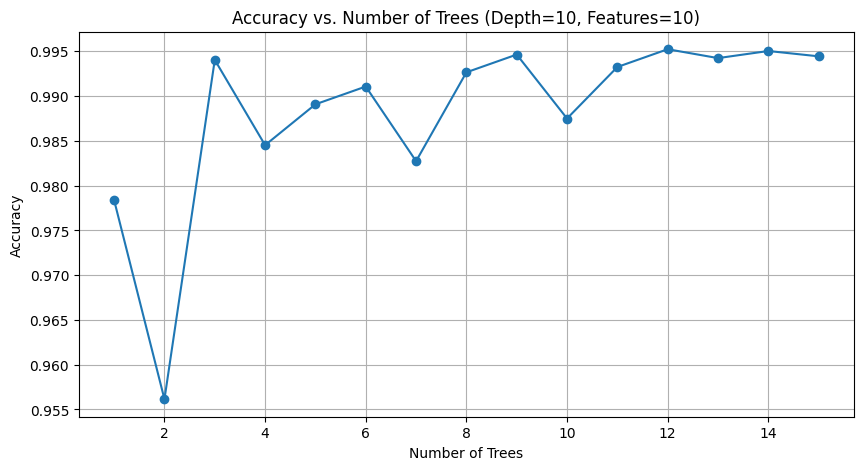

Sample: 0.3, Trees: 5, Depth: 3, Features: 5 ‚Üí Accuracy: 0.9544
Sample: 0.3, Trees: 5, Depth: 3, Features: 10 ‚Üí Accuracy: 0.9409
Sample: 0.3, Trees: 5, Depth: 3, Features: 15 ‚Üí Accuracy: 0.9758
Sample: 0.3, Trees: 5, Depth: 4, Features: 5 ‚Üí Accuracy: 0.9309
Sample: 0.3, Trees: 5, Depth: 4, Features: 10 ‚Üí Accuracy: 0.9720
Sample: 0.3, Trees: 5, Depth: 4, Features: 15 ‚Üí Accuracy: 0.9815
Sample: 0.3, Trees: 5, Depth: 5, Features: 5 ‚Üí Accuracy: 0.9682
Sample: 0.3, Trees: 5, Depth: 5, Features: 10 ‚Üí Accuracy: 0.9825
Sample: 0.3, Trees: 5, Depth: 5, Features: 15 ‚Üí Accuracy: 0.9790
Sample: 0.3, Trees: 5, Depth: 6, Features: 5 ‚Üí Accuracy: 0.9460
Sample: 0.3, Trees: 5, Depth: 6, Features: 10 ‚Üí Accuracy: 0.9752
Sample: 0.3, Trees: 5, Depth: 6, Features: 15 ‚Üí Accuracy: 0.9919
Sample: 0.3, Trees: 5, Depth: 7, Features: 5 ‚Üí Accuracy: 0.9553
Sample: 0.3, Trees: 5, Depth: 7, Features: 10 ‚Üí Accuracy: 0.9637
Sample: 0.3, Trees: 5, Depth: 7, Features: 15 ‚Üí Accuracy: 0.9881


In [22]:
# Example usage for each:
experiment_depth_effect_comb(x, y, n_trees=10, sample_ratio=0.5, n_features=10, combined_sampling=True)
experiment_feature_count_effect_comb(x, y, n_trees=10, sample_ratio=0.5, max_depth=10)
experiment_tree_count_effect_comb(x, y, sample_ratio=0.5, max_depth=10, n_features=10, combined_sampling=True)

# Grid search
sample_ratios = [0.3, 0.5, 0.7]
tree_counts = [5, 10, 15]
depths = [3,4,5,6,7,9, 10, None]
n_features_list = [5, 10, 15]

best_sample, best_trees, best_depth, best_features = grid_search_rf_comb(x, y, sample_ratios, tree_counts, depths, n_features_list)

# Train final model with best params
final_model = MyRandomForest_comb(n_trees=best_trees, sample_ratio=best_sample, max_depth=best_depth,
                             n_features=best_features, combined_sampling=True)
final_model.fit(x_train, y_train)
final_preds = final_model.predict(x_test)
print(" Final Accuracy:", accuracy_score(y_test, final_preds))


In [23]:
# Final Configuration
best_sample_ratio = 0.3
best_n_trees = 100
best_max_depth = None
best_n_features = 10
combined_sampling = True  # Since it's best with combined sampling

# Instantiate and train the final model
final_model = MyRandomForest_comb(
    n_trees=best_n_trees,
    sample_ratio=best_sample_ratio,
    max_depth=best_max_depth,
    n_features=best_n_features,
    combined_sampling=combined_sampling
)

In [37]:
!pip install scapy
import csv
import os
from scapy.all import sniff, IP, TCP, UDP
from collections import defaultdict, deque
import time
import socket

# ======= File setup =======
csv_file_path = "/content/real_time_nids_features.csv"
csv_header = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land",
    "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in", "num_compromised",
    "root_shell", "su_attempted", "num_root", "num_file_creations", "num_shells",
    "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login",
    "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate",
    "srv_rerror_rate", "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate",
    "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate",
    "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate", "dst_host_serror_rate",
    "dst_host_srv_serror_rate", "dst_host_rerror_rate",
    "dst_host_srv_rerror_rate"
]

# Write header only once
if not os.path.exists(csv_file_path):
    with open(csv_file_path, mode='w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(csv_header)

# ======= Flow tracking setup =======
flows = defaultdict(lambda: {
    'start_time': None,
    'end_time': None,
    'src_bytes': 0,
    'dst_bytes': 0,
    'count': 0,
    'services': set(),
    'dst_hosts': set(),
    'ports': set(),
    'tcp_flags': [],
    'logged_in': 0,
})

window = deque(maxlen=1000)
window_duration = 2  # seconds

def map_port_to_service(port):
    common_ports = {
        20: 'ftp_data',
        21: 'ftp',
        22: 'ssh',
        23: 'telnet',
        25: 'smtp',
        53: 'domain',
        69: 'tftp_u',
        80: 'http',
        110: 'pop_3',
        111: 'sunrpc',
        119: 'nntp',
        123: 'ntp_u',
        135: 'epmap',
        137: 'netbios_ns',
        138: 'netbios_dgm',
        139: 'netbios_ssn',
        143: 'imap4',
        161: 'snmp',
        162: 'snmptrap',
        179: 'bgp',
        443: 'https',
        445: 'microsoft_ds',
        513: 'login',
        514: 'shell',
        515: 'printer',
        520: 'route',
        540: 'uucp',
        635: 'mountd',
        8080: 'http',
    }

    if port in common_ports:
        return common_ports[port]
    elif port >= 1024:
        return 'private'
    else:
        return 'other'

def get_service(port):
    try:
        return socket.getservbyport(port)
    except OSError:
        return str(port)

def map_flags_to_dataset(flag):
    if flag in ['PA', 'A', 'P', 'FA', 'F']:
        return 'SF'
    elif flag == 'S':
        return 'S0'
    elif flag in ['R', 'RA']:
        return 'REJ'
    else:
        return 'OTH'

def extract_features(pkt):
    if not IP in pkt:
        return

    ip = pkt[IP]
    proto = pkt.proto
    now = time.time()

    if TCP in pkt or UDP in pkt:
        sport = pkt.sport
        dport = pkt.dport
    else:
        sport = dport = 0

    key = (ip.src, ip.dst, sport, dport, proto)

    flow = flows[key]
    if flow['start_time'] is None:
        flow['start_time'] = now
    flow['end_time'] = now

    flow['count'] += 1
    size = len(pkt)

    if ip.src == key[0]:
        flow['src_bytes'] += size
    else:
        flow['dst_bytes'] += size

    flow['services'].add(map_port_to_service(dport))
    flow['dst_hosts'].add(ip.dst)
    flow['ports'].add(dport)

    if TCP in pkt:
        tcp = pkt[TCP]
        flow['tcp_flags'].append(tcp.flags)
        if tcp.flags == "S":
            flow['logged_in'] = 0
        if tcp.flags == "PA":
            flow['logged_in'] = 1

    window.append({
        'src': ip.src,
        'dst': ip.dst,
        'proto': proto,
        'service': map_port_to_service(dport),
        'timestamp': now
    })

    duration = flow['end_time'] - flow['start_time']
    protocol_type = {6: 'tcp', 17: 'udp', 1: 'icmp'}.get(proto, 'other')
    service = list(flow['services'])[0] if flow['services'] else '0'
    raw_flag = flow['tcp_flags'][-1] if flow['tcp_flags'] else '0'
    flag = map_flags_to_dataset(str(raw_flag))  # Normalize it
    src_bytes = flow['src_bytes']
    dst_bytes = flow['dst_bytes']
    land = 1 if ip.src == ip.dst and sport == dport else 0

    wrong_fragment = 0
    urgent = 0
    hot = 0
    num_failed_logins = 0
    logged_in = flow['logged_in']
    num_compromised = 0
    root_shell = 0
    su_attempted = 0
    num_root = 0
    num_file_creations = 0
    num_shells = 0
    num_access_files = 0
    num_outbound_cmds = 0
    is_host_login = 0
    is_guest_login = 0

    recent = [w for w in window if now - w['timestamp'] <= window_duration]
    count = len([w for w in recent if w['dst'] == ip.dst])
    srv_count = len([w for w in recent if w['dst'] == ip.dst and w['service'] == service])

    serror_rate = 0
    srv_serror_rate = 0
    rerror_rate = 0
    srv_rerror_rate = 0
    same_srv_rate = srv_count / count if count else 0
    diff_srv_rate = 1 - same_srv_rate
    srv_diff_host_rate = 0

    dst_host_count = count
    dst_host_srv_count = srv_count
    dst_host_same_srv_rate = same_srv_rate
    dst_host_diff_srv_rate = diff_srv_rate
    dst_host_same_src_port_rate = 0
    dst_host_srv_diff_host_rate = 0
    dst_host_serror_rate = 0
    dst_host_srv_serror_rate = 0
    dst_host_rerror_rate = 0
    dst_host_srv_rerror_rate = 0

    features = [
        duration, protocol_type, service, flag, src_bytes, dst_bytes, land,
        wrong_fragment, urgent, hot, num_failed_logins, logged_in, num_compromised,
        root_shell, su_attempted, num_root, num_file_creations, num_shells,
        num_access_files, num_outbound_cmds, is_host_login, is_guest_login,
        count, srv_count, serror_rate, srv_serror_rate, rerror_rate,
        srv_rerror_rate, same_srv_rate, diff_srv_rate, srv_diff_host_rate,
        dst_host_count, dst_host_srv_count, dst_host_same_srv_rate,
        dst_host_diff_srv_rate, dst_host_same_src_port_rate,
        dst_host_srv_diff_host_rate, dst_host_serror_rate,
        dst_host_srv_serror_rate, dst_host_rerror_rate,
        dst_host_srv_rerror_rate
    ]

    # Save row to CSV
    with open(csv_file_path, mode='a', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(features)

    print("Captured:", features[:5], "...")  # Print a summary

def start_sniffing(iface="eth0"):
    print("[*] Capturing packets & writing to:", csv_file_path)
    sniff(iface=iface, prn=extract_features, store=0)

if __name__ == "__main__":
    start_sniffing("eth0")  # Or "wlan0" or your actual Colab interface


[*] Capturing packets & writing to: /content/real_time_nids_features.csv
Captured: [0.0, 'tcp', 'private', 'SF', 759] ...
Captured: [0.0, 'tcp', 'http', 'SF', 66] ...
Captured: [0.20381712913513184, 'tcp', 'private', 'SF', 1540] ...
Captured: [0.20376229286193848, 'tcp', 'http', 'SF', 132] ...
Captured: [0.4074094295501709, 'tcp', 'private', 'SF', 2355] ...
Captured: [0.40730810165405273, 'tcp', 'http', 'SF', 198] ...
Captured: [0.0, 'tcp', 'private', 'SF', 852] ...
Captured: [0.0, 'tcp', 'http', 'SF', 66] ...
Captured: [0.6110060214996338, 'tcp', 'private', 'SF', 3265] ...
Captured: [0.611018180847168, 'tcp', 'http', 'SF', 264] ...
Captured: [0.8146159648895264, 'tcp', 'private', 'SF', 4077] ...
Captured: [0.8145127296447754, 'tcp', 'http', 'SF', 330] ...
Captured: [1.0181739330291748, 'tcp', 'private', 'SF', 4890] ...
Captured: [1.0181074142456055, 'tcp', 'http', 'SF', 396] ...
Captured: [1.2218425273895264, 'tcp', 'private', 'SF', 5703] ...
Captured: [1.221977949142456, 'tcp', 'http

In [25]:
# rf_row = MyRandomForest(n_trees=5, max_depth=None, n_features=None)

# # Fit the model on your dataset
# rf_row.fit(x_train, y_train)



In [34]:
# # Updated Real-Time NIDS Feature Extraction Script

# !pip install scapy psutil pyinotify > /dev/null

# import csv
# import os
# from scapy.all import sniff, IP, TCP, UDP
# from collections import defaultdict, deque
# import time
# import socket
# import psutil
# import threading
# import pandas as pd

# csv_file_path = "/content/real_time_nids_features.csv"
# csv_header = [
#     "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land",
#     "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in", "num_compromised",
#     "root_shell", "su_attempted", "num_root", "num_file_creations", "num_shells",
#     "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login",
#     "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate",
#     "srv_rerror_rate", "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate",
#     "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate",
#     "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
#     "dst_host_srv_diff_host_rate", "dst_host_serror_rate",
#     "dst_host_srv_serror_rate", "dst_host_rerror_rate",
#     "dst_host_srv_rerror_rate"
# ]

# if not os.path.exists(csv_file_path):
#     with open(csv_file_path, mode='w', newline='') as f:
#         writer = csv.writer(f)
#         writer.writerow(csv_header)

# flows = defaultdict(lambda: {
#     'start_time': None,
#     'end_time': None,
#     'src_bytes': 0,
#     'dst_bytes': 0,
#     'count': 0,
#     'services': set(),
#     'dst_hosts': set(),
#     'ports': set(),
#     'tcp_flags': [],
#     'logged_in': 0,
# })

# window = deque(maxlen=1000)
# window_duration = 2

# num_login_attempts = 0
# num_shell_activities = 0
# num_file_operations = 0


# def monitor_logins():
#     global num_login_attempts
#     while True:
#         try:
#             users = psutil.users()
#             num_login_attempts = len(users)
#         except Exception:
#             num_login_attempts = 0
#         time.sleep(2)


# def monitor_shell():
#     global num_shell_activities
#     while True:
#         try:
#             procs = [p.name() for p in psutil.process_iter(['name']) if p.name() in ["bash", "sh", "zsh"]]
#             num_shell_activities = len(procs)
#         except Exception:
#             num_shell_activities = 0
#         time.sleep(2)


# def monitor_file_creations():
#     global num_file_operations
#     before = set(os.listdir('/tmp'))
#     while True:
#         time.sleep(2)
#         after = set(os.listdir('/tmp'))
#         created = after - before
#         num_file_operations = len(created)
#         before = after


# def map_port_to_service(port):
#     common_ports = {
#         20: 'ftp_data', 21: 'ftp', 22: 'ssh', 23: 'telnet', 25: 'smtp',
#         53: 'domain', 69: 'tftp_u', 80: 'http', 110: 'pop_3', 443: 'https',
#         513: 'login', 514: 'shell', 8080: 'http'
#     }
#     return common_ports.get(port, 'private' if port >= 1024 else 'other')


# def map_flags_to_dataset(flag):
#     if flag in ['PA', 'A', 'P', 'FA', 'F']:
#         return 'SF'
#     elif flag == 'S':
#         return 'S0'
#     elif flag in ['R', 'RA']:
#         return 'REJ'
#     else:
#         return 'OTH'


# def extract_features(pkt):
#     if not IP in pkt:
#         return

#     ip = pkt[IP]
#     proto = pkt.proto
#     now = time.time()

#     sport = pkt.sport if TCP in pkt or UDP in pkt else 0
#     dport = pkt.dport if TCP in pkt or UDP in pkt else 0
#     key = (ip.src, ip.dst, sport, dport, proto)

#     flow = flows[key]
#     if flow['start_time'] is None:
#         flow['start_time'] = now
#     flow['end_time'] = now

#     flow['count'] += 1
#     size = len(pkt)

#     if ip.src == key[0]:
#         flow['src_bytes'] += size
#     else:
#         flow['dst_bytes'] += size

#     flow['services'].add(map_port_to_service(dport))
#     flow['dst_hosts'].add(ip.dst)
#     flow['ports'].add(dport)

#     if TCP in pkt:
#         tcp = pkt[TCP]
#         flow['tcp_flags'].append(tcp.flags)
#         if tcp.flags == "S":
#             flow['logged_in'] = 0
#         if tcp.flags == "PA":
#             flow['logged_in'] = 1

#     window.append({
#         'src': ip.src, 'dst': ip.dst, 'proto': proto,
#         'service': map_port_to_service(dport), 'timestamp': now
#     })

#     duration = flow['end_time'] - flow['start_time']
#     protocol_type = {6: 'tcp', 17: 'udp', 1: 'icmp'}.get(proto, 'other')
#     service = list(flow['services'])[0] if flow['services'] else '0'
#     raw_flag = flow['tcp_flags'][-1] if flow['tcp_flags'] else '0'
#     flag = map_flags_to_dataset(str(raw_flag))
#     src_bytes = flow['src_bytes']
#     dst_bytes = flow['dst_bytes']
#     land = 1 if ip.src == ip.dst and sport == dport else 0

#     wrong_fragment = 0
#     urgent = 0
#     hot = 0
#     num_failed_logins = 0
#     logged_in = flow['logged_in']
#     num_compromised = 0
#     root_shell = 0
#     su_attempted = 0
#     num_root = 0
#     num_file_creations = 0
#     num_shells = 0
#     num_access_files = 0
#     num_outbound_cmds = 0
#     is_host_login = 0
#     is_guest_login = 0

#     recent = [w for w in window if now - w['timestamp'] <= window_duration]
#     count = len([w for w in recent if w['dst'] == ip.dst])
#     srv_count = len([w for w in recent if w['dst'] == ip.dst and w['service'] == service])

#     same_srv_rate = srv_count / count if count else 0
#     diff_srv_rate = 1 - same_srv_rate

#     features = [
#         duration, protocol_type, service, flag, src_bytes, dst_bytes, land,
#         wrong_fragment, urgent, hot, num_failed_logins, logged_in, num_compromised,
#         root_shell, su_attempted, num_root, num_file_creations, num_shells,
#         num_access_files, num_outbound_cmds, is_host_login, is_guest_login,
#         count, srv_count, serror_rate, srv_serror_rate, rerror_rate,
#         srv_rerror_rate, same_srv_rate, diff_srv_rate, srv_diff_host_rate,
#         dst_host_count, dst_host_srv_count, dst_host_same_srv_rate,
#         dst_host_diff_srv_rate, dst_host_same_src_port_rate,
#         dst_host_srv_diff_host_rate, dst_host_serror_rate,
#         dst_host_srv_serror_rate, dst_host_rerror_rate,
#         dst_host_srv_rerror_rate
#     ]

#     with open(csv_file_path, mode='a', newline='') as f:
#         writer = csv.writer(f)
#         writer.writerow(features)

#     print("Captured:", features[:5], "...")


# def start_sniffing(iface="eth0"):
#     print("[*] Capturing packets & writing to:", csv_file_path)
#     sniff(iface=iface, prn=extract_features, store=0)


# if __name__ == "__main__":
#     threading.Thread(target=monitor_logins, daemon=True).start()
#     threading.Thread(target=monitor_shell, daemon=True).start()
#     threading.Thread(target=monitor_file_creations, daemon=True).start()

#     start_sniffing("eth0")


[*] Capturing packets & writing to: /content/real_time_nids_features.csv


In [38]:
import pandas as pd
from collections import Counter
from sklearn.preprocessing import LabelEncoder

# Load unlabeled data
unlabeled_data = pd.read_csv("real_time_nids_features.csv")
for col in unlabeled_data.columns:
    if unlabeled_data[col].dtype == 'object':
        le = LabelEncoder()
        unlabeled_data[col] = le.fit_transform(unlabeled_data[col].astype(str))
# model.predict(unlabeled_data)
preds = model.predict(unlabeled_data)

# Count predictions
prediction_counts = Counter(preds)
print(" Prediction Count:", dict(prediction_counts))

# Final Say
if prediction_counts:
    final_class = prediction_counts.most_common(1)[0][0]
    if final_class == 1 or final_class == 'anomaly':
        print(" Final Say: Anomaly Detected")
    else:
        print("Final Say: Normal Behavior")
else:
    print(" Final Say: No predictions made. Check your data or model.")

 Prediction Count: {np.int64(0): 56, np.int64(1): 17}
Final Say: Normal Behavior


In [30]:
# new_preds = rf_row.predict(unlabeled_data)

# # Count predictions
# prediction_counts = Counter(new_preds)
# print("üîç Prediction Count:", dict(prediction_counts))

# # Final Say
# if prediction_counts:
#     final_class = prediction_counts.most_common(1)[0][0]
#     if final_class == 1 or final_class == 'anomaly':
#         print(" Final Say: Anomaly Detected")
#     else:
#         print("Final Say: Normal Behavior")
# else:
#     print(" Final Say: No predictions made. Check your data or model.")
